## Staging field for experimenting with dataset

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import seaborn as sns # Visualization
import matplotlib.pyplot as plt # Visualization

from sklearn.metrics import mean_absolute_error, mean_squared_error
import math

import warnings # Supress warnings 
warnings.filterwarnings('ignore')

pd.set_option('display.max_rows', 200) #total row able to be displayed in jupyter notebook
sns.set_style("whitegrid")

In [2]:
df = pd.read_csv("Aquifer_Petrignano.csv")

# Drop data before 2009 for the purpose of this tutorial
df = df[df.Rainfall_Bastia_Umbra.notna()].reset_index(drop=True)
# Drop one of the target columns, so we can focus on only one target
df = df.drop(['Depth_to_Groundwater_P24', 'Temperature_Petrignano'], axis=1)

# Simplify column names
df.columns = ['Date', 'Rainfall', 'Depth_to_Groundwater', 'Temperature', 'Drainage_Volume', 'River_Hydrometry']

targets = ['Depth_to_Groundwater']
features = [feature for feature in df.columns if feature not in targets]
df.head()

,Date,Rainfall,Depth_to_Groundwater,Temperature,Drainage_Volume,River_Hydrometry
0,01/01/2009,0.0,-31.14,5.2,-24530.688,2.4
1,02/01/2009,0.0,-31.11,2.3,-28785.888,2.5
2,03/01/2009,0.0,-31.07,4.4,-25766.208,2.4
3,04/01/2009,0.0,-31.05,0.8,-27919.296,2.4
4,05/01/2009,0.0,-31.01,-1.9,-29854.656,2.3


In [3]:
from datetime import datetime, date 

df['Date'] = pd.to_datetime(df.Date, format = '%d/%m/%Y')
df.head().style.set_properties(subset=['Date'], **{'background-color': 'dodgerblue'})

,Date,Rainfall,Depth_to_Groundwater,Temperature,Drainage_Volume,River_Hydrometry
0,2009-01-01 00:00:00,0.000000,-31.140000,5.200000,-24530.688000,2.400000
1,2009-01-02 00:00:00,0.000000,-31.110000,2.300000,-28785.888000,2.500000
2,2009-01-03 00:00:00,0.000000,-31.070000,4.400000,-25766.208000,2.400000
3,2009-01-04 00:00:00,0.000000,-31.050000,0.800000,-27919.296000,2.400000
4,2009-01-05 00:00:00,0.000000,-31.010000,-1.900000,-29854.656000,2.300000


### Staging Area

In [4]:
df.corr()

,Rainfall,Depth_to_Groundwater,Temperature,Drainage_Volume,River_Hydrometry
Rainfall,1.000000,0.067708,-0.052813,0.136405,0.141373
Depth_to_Groundwater,0.067708,1.000000,0.117417,0.360793,0.000276
Temperature,-0.052813,0.117417,1.000000,-0.069267,-0.434575
Drainage_Volume,0.136405,0.360793,-0.069267,1.000000,0.216617
River_Hydrometry,0.141373,0.000276,-0.434575,0.216617,1.000000


<AxesSubplot:>

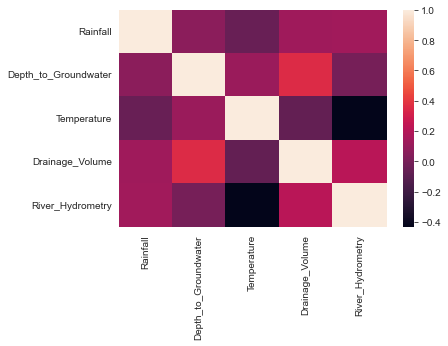

In [5]:
sns.heatmap(df.corr())

<AxesSubplot:xlabel='Date', ylabel='Depth_to_Groundwater'>

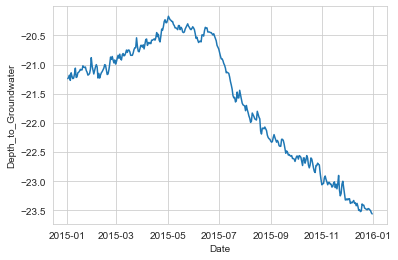

In [6]:
sns.lineplot(
    data = df[(df.Date > datetime(2015, 1, 1)) & (df.Date < datetime(2016, 1, 1))],
    x = 'Date',
    y = 'Depth_to_Groundwater'
)

<AxesSubplot:xlabel='Date', ylabel='River_Hydrometry'>

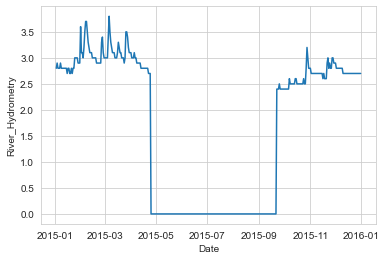

In [7]:
sns.lineplot(
    data = df[(df.Date > datetime(2015, 1, 1)) & (df.Date < datetime(2016, 1, 1))],
    x = 'Date',
    y = 'River_Hydrometry'
)